In [1]:
import pandas

In [2]:
#importation des données
users = pandas.read_csv("C:\Users\Jihen\Desktop\Jihene\INSAT\INSAT\GL4\semestre2\PFA\data_final_clustering3.csv",sep=",",header=0,index_col=0)

In [3]:
#dimension des données
print(users.shape)

(82, 33)


In [4]:
#statistiques descriptives
print(users.describe())

       Photography  Sculpture       Home    Animals    Charity        Law  \
count    82.000000  82.000000  82.000000  82.000000  82.000000  82.000000   
mean      0.032207   0.031743   0.027887   0.030900   0.022938   0.023153   
std       0.029293   0.035145   0.024322   0.023278   0.025442   0.035811   
min       0.000127   0.000268   0.001439   0.000077   0.000125   0.000055   
25%       0.009891   0.008377   0.010057   0.016785   0.003351   0.000412   
50%       0.028667   0.020084   0.024520   0.026971   0.021357   0.008202   
75%       0.039114   0.043028   0.035929   0.038352   0.035707   0.031915   
max       0.124842   0.142357   0.121362   0.131409   0.145335   0.139321   

        Military   Politics   Religion     Travel        ...         \
count  82.000000  82.000000  82.000000  82.000000        ...          
mean    0.027638   0.025998   0.025175   0.049302        ...          
std     0.035509   0.040202   0.024878   0.042727        ...          
min     0.000082   0.0

In [ ]:
#graphique - croisement deux à deux des variables
from pandas.plotting import scatter_matrix
scatter_matrix(users,figsize=(199,35)) 


In [39]:
#k-means sur les données centrées et réduites
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=22)
kmeans.fit(users)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=22, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
#index triés des groupes
import numpy as np
idk = np.argsort(kmeans.labels_)

In [18]:
pandas.options.display.max_rows = 4000

In [41]:
#affichage des observations et leurs groupes
print(pandas.DataFrame(users.index[idk],kmeans.labels_[idk]))

                  Username
0                 shopliv3
0               nickfarrar
0               issycroker
0             urbanlawyers
0                dalailama
0    foldedpagesdistillery
0        theunusefulidiots
0            lse.economics
1                   bhgaus
1        yourhomeandgarden
1            grillodesigns
2             chrisburkard
2             wheresmollie
2         youngadventuress
3   november_whiskey_oscar
3              dnewsome830
3            ryanscott3335
4              sketchymuma
4     makethevowkeepthevow
4              oniro.games
4         foxinthesnowcafe
4                     sega
5           technologyspot
5                    verge
5               sirajraval
5           american_heart
5         technologyreview
5         programmers_spot
5               techcrunch
6                  benlowy
6   asasjostromphotography
6            jessicavwalsh
6            nukeproofsuit
6          creativesession
6              muradosmann
7             ysabellecaps
7

In [26]:
np.set_printoptions(threshold=5000)

In [42]:
#distances aux centres de classes des observations
print(kmeans.transform(users))

[[  2.21227799e-02   1.75678942e-01   2.20951360e-01   2.32025897e-01
    2.57741227e-01   2.05442698e-01   2.20483962e-01   2.11273320e-01
    2.59821889e-01   2.16585134e-01   2.28885455e-01   2.39130628e-01
    2.05217793e-01   2.36960854e-01   2.29917835e-01   2.22433708e-01
    2.42234863e-01   2.13221372e-01   2.40650962e-01   2.05076413e-01
    1.79863708e-01   1.89491029e-01]
 [  3.55518561e-02   1.83178668e-01   2.21738867e-01   2.31232723e-01
    2.66389795e-01   2.06966297e-01   2.25841736e-01   2.24825080e-01
    2.58475744e-01   2.23857443e-01   2.29530858e-01   2.44119037e-01
    2.18948717e-01   2.41858347e-01   2.31125644e-01   2.32213974e-01
    2.54859483e-01   2.21073152e-01   2.53715358e-01   2.09582417e-01
    1.80476915e-01   1.94364448e-01]
 [  2.96898517e-02   1.90672309e-01   2.31191793e-01   2.33331000e-01
    2.73459493e-01   2.17936905e-01   2.36871591e-01   2.17094765e-01
    2.61598016e-01   2.22875476e-01   2.48610645e-01   2.36596905e-01
    1.99965075e-

In [ ]:
#correspondance avec les groupes de la CAH
#pandas.crosstab(groupes_cah,kmeans.labels_)

In [9]:
#Méthode des centres mobiles
#Aide à la détection du nombre adéquat de groupes

#librairie pour évaluation des partitions
from sklearn import metrics

In [28]:
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
import numpy as np
res = np.arange(33,dtype="double")
for k in np.arange(33):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(users)
    res[k] = metrics.silhouette_score(users,km.labels_)
print(res)

[ 0.15463402  0.17763112  0.20110053  0.21929167  0.23394326  0.25775938
  0.26978246  0.2902185   0.30691245  0.31126231  0.32345375  0.35327748
  0.36519492  0.36041063  0.37149177  0.39237513  0.40882943  0.41245196
  0.41478647  0.44741398  0.41362643  0.42547605  0.42641324  0.434935
  0.41630769  0.4218329   0.41188111  0.43022719  0.40030591  0.38354904
  0.41573711  0.41469773  0.39828717]


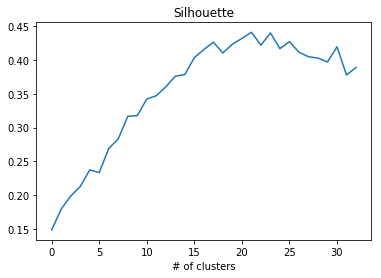

In [13]:
#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(0,33,1),res)
plt.show()


In [ ]:
#Interprétation des classes
#Statistiques comparatives


In [29]:
#moyenne par variable
m = users.mean()
#TSS
TSS = users.shape[0]*users.var(ddof=0)
print(TSS)
#data.frame conditionnellement aux groupes
gb = users.groupby(kmeans.labels_)
#effectifs conditionnels
nk = gb.size()
print(nk)
#moyennes conditionnelles
mk = gb.mean()
print(mk)
#pour chaque groupe écart à la moyenne par variable
EMk = (mk-m)**2
#pondéré par les effectifs du groupe
EM = EMk.multiply(nk,axis=0)
#somme des valeurs => BSS
BSS = np.sum(EM,axis=0)
print(BSS)
#carré du rapport de corrélation
#variance expliquée par l'appartenance aux groupes
#pour chaque variable
R2 = BSS/TSS
print(R2)


Photography           0.069503
Sculpture             0.100046
Home                  0.047916
Animals               0.043892
Charity               0.052432
Law                   0.103878
Military              0.102131
Politics              0.130914
Religion              0.050132
Travel                0.147872
Vehicles              0.062621
Shopping              0.041617
Outdoor recreation    0.066671
Sports                0.044072
Fitness               0.118933
Technology            0.115812
News                  0.113330
Painting              0.066670
Architecture          0.118209
Books                 0.080466
Business              0.048231
RealEstate            0.051704
Dance                 0.079282
Engineering           0.100021
Family                0.084260
Food                  0.149355
Games                 0.075767
HealthCare            0.073148
Live Events           0.048410
Movies                0.027445
Science               0.063750
TV                    0.090672
Entrepre

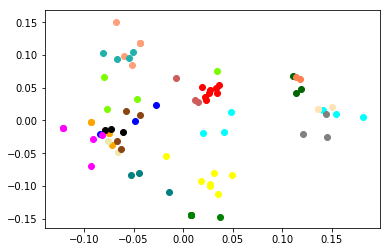

In [46]:
#ACP
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
acp = PCA(n_components=22).fit_transform(users) 
for couleur,k in zip(['red','blue','lawngreen','aqua','green','yellow','orange', 'lightsalmon', 'gray', 'black', 'teal','cyan','darkgreen','moccasin','fuchsia','indianred','lawngreen','lightseagreen','coral','palegoldenrod', 'saddlebrown' ],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show() 

In [47]:
from jqmcvi import base
base.dunn(users)

ImportError: No module named jqmcvi

In [48]:
resDB = np.arange(33,dtype="double")
for k in np.arange(33):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(users)
    resDB[k] = metrics.davies_bouldin_score(users,km.labels_)
print(resDB) 

C:\Users\Jihen\Miniconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Jihen\Miniconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[ 2.35935844  1.93799577  1.70855274  1.73985884  1.50789796  1.69378652
  1.38185005  1.42623934  1.36787545  1.28267824  1.20051025  1.15885672
  1.22443066  1.0665654   1.10863564  0.96377958  0.9491047   0.93618692
  1.01279733  0.86101531  0.86501744  0.83198916  0.83242613  0.74783079
  0.78604706  0.76961655  0.71435166  0.70145176  0.66901348  0.70819429
  0.69589762  0.64589945  0.65763215]


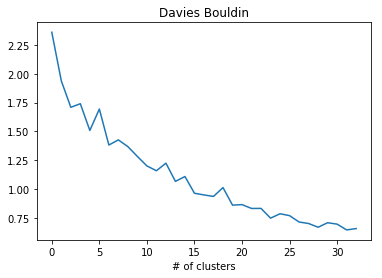

In [49]:
plt.title("Davies Bouldin")
plt.xlabel("# of clusters")
plt.plot(np.arange(0,33,1),resDB)
plt.show()

In [53]:
from sklearn.metrics import pairwise_distances
resCH = np.arange(33,dtype="double")
for k in np.arange(33):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(users)
    resCH[k] = metrics.calinski_harabaz_score(users,km.labels_)
print(resCH)  

[ 13.53540472  12.23693705  13.7708633   13.64128552  12.78301127
  12.75427988  12.55679666  12.31118927  12.75198441  12.63537714
  12.8856435   12.485265    13.33867373  13.51599739  14.37113537
  14.53790793  14.28803906  15.56755731  15.41653389  15.15620942
  16.12185161  15.72722945  16.27605453  17.14184457  16.94074041
  16.37878733  16.674547    16.57231952  16.39286839  16.2776636
  16.25601308  16.38407513  16.03326613]


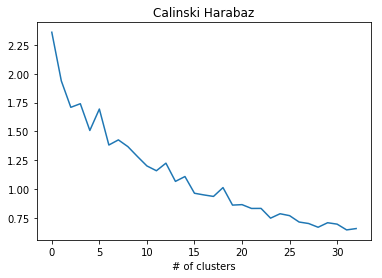

In [54]:
plt.title("Calinski Harabaz")
plt.xlabel("# of clusters")
plt.plot(np.arange(0,33,1),resDB)
plt.show()

In [61]:
# -*- coding: utf-8 -*-
__author__ = "Joaquim Viegas"

""" JQM_CV - Python implementations of Dunn and Davis Bouldin clustering validity indices
dunn(k_list):
    Slow implementation of Dunn index that depends on numpy
    -- basec.pyx Cython implementation is much faster but flower than dunn_fast()
dunn_fast(points, labels):
    Fast implementation of Dunn index that depends on numpy and sklearn.pairwise
    -- No Cython implementation
davisbouldin(k_list, k_centers):
    Implementation of Davis Boulding index that depends on numpy
    -- basec.pyx Cython implementation is much faster
"""

import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    
def dunn(k_list):
    """ Dunn index [CVI]
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    """
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

def delta_fast(ck, cl, distances):
    values = distances[np.where(ck)][:, np.where(cl)]
    values = values[np.nonzero(values)]

    return np.min(values)
    
def big_delta_fast(ci, distances):
    values = distances[np.where(ci)][:, np.where(ci)]
    #values = values[np.nonzero(values)]
            
    return np.max(values)

def dunn_fast(points, labels):
    """ Dunn index - FAST (using sklearn pairwise euclidean_distance function)
    
    Parameters
    ----------
    points : np.array
        np.array([N, p]) of all points
    labels: np.array
        np.array([N]) labels of all points
    """
    distances = euclidean_distances(points)
    ks = np.sort(np.unique(labels))
    
    deltas = np.ones([len(ks), len(ks)])*1000000
    big_deltas = np.zeros([len(ks), 1])
    
    l_range = list(range(0, len(ks)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta_fast((labels == ks[k]), (labels == ks[l]), distances)
        
        big_deltas[k] = big_delta_fast((labels == ks[k]), distances)

    di = np.min(deltas)/np.max(big_deltas)
    return di
    
    
def  big_s(x, center):
    len_x = len(x)
    total = 0
        
    for i in range(len_x):
        total += np.linalg.norm(x[i]-center)    
    
    return total/len_x

def davisbouldin(k_list, k_centers):
    """ Davis Bouldin Index
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    k_centers : np.array
        The array of the cluster centers (prototypes) of type np.array([K, p])
    """
    len_k_list = len(k_list)
    big_ss = np.zeros([len_k_list], dtype=np.float64)
    d_eucs = np.zeros([len_k_list, len_k_list], dtype=np.float64)
    db = 0    

    for k in range(len_k_list):
        big_ss[k] = big_s(k_list[k], k_centers[k])

    for k in range(len_k_list):
        for l in range(0, len_k_list):
            d_eucs[k, l] = np.linalg.norm(k_centers[k]-k_centers[l])

    for k in range(len_k_list):
        values = np.zeros([len_k_list-1], dtype=np.float64)
        for l in range(0, k):
            values[l] = (big_ss[k] + big_ss[l])/d_eucs[k, l]
        for l in range(k+1, len_k_list):
            values[l-1] = (big_ss[k] + big_ss[l])/d_eucs[k, l]

        db += np.max(values)
    res = db/len_k_list
    return res

In [71]:
resD = np.arange(33,dtype="double")
for k in np.arange(33):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(users)
    resD[k] = dunn_fast(users,km.labels_)
print(resD)  

[ 0.43601352  0.52103146  0.41267697  0.40492289  0.41908019  0.3165923
  0.30230525  0.31783394  0.40599392  0.34717951  0.28808245  0.44059419
  0.4423344   0.35312158  0.37867769  0.51503145  0.56814926  0.49531467
  0.4759671   0.62101185  0.61689021  0.59252206  0.66176983  0.56890996
  0.57458977  0.57870768  0.50678706  0.73722673  0.66487194  0.78258627
  0.59896818  0.78577679  0.67807368]


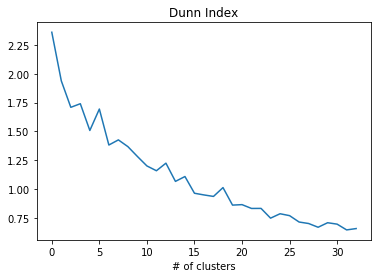

In [72]:
plt.title("Dunn Index")
plt.xlabel("# of clusters")
plt.plot(np.arange(0,33,1),resDB)
plt.show()